In [95]:
# The data comes from: @https://data.humdata.org/dataset/novel-coronavirus-2019-ncov-cases
# It's in CSV format where each row shows the progression of cases for 
# a country or a state/province of a country

# Reference to some of the LSTM code:
# @https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/

import csv
import numpy as np

n_samples = 10  # how many training samples we wish to obtain
n_steps_in = 20
n_steps_out = 5  # how many days we wish to predict

def read_data(filename):
    Xtrain, ytrain = [], []
    Xtest, ytest = [], []
    with open(filename) as f:
        r = csv.reader(f)
        next(r, None)  # skip header
        for row in r:
            # Starting from the 5th column of each row (index 4) shows the
            # progression of cases starting 01/22/2020
            if row[1] == 'US':  # Exclude the United States, since it's used for testing
                Xtest.append([int(x) for x in row[-n_steps_out - n_steps_in:-n_steps_out]])
                ytest.append([int(x) for x in row[-n_steps_out:]])
            else:
                Xtrain.append([int(x) for x in row[-n_steps_out - n_steps_in:-n_steps_out]])
                ytrain.append([int(x) for x in row[-n_steps_out:]])
    return Xtrain[:n_samples], ytrain[:n_samples], Xtest, ytest

Xc, yc, Xct, yct = read_data('time_series_covid19_confirmed_global.csv')  # confirmed
Xd, yd, Xdt, ydt = read_data('time_series_covid19_deaths_global.csv')   # death
            
X = np.array([Xc, Xd])
Xt = np.array([Xct, Xdt])

n_samples = X.shape[1]
n_steps_in = X.shape[2]   # equal to total number of dates - n_steps_out
n_features = X.shape[0]

X = X.reshape((n_samples, n_steps_in, n_features))
yc = np.array(yc).reshape((n_samples, n_steps_out, 1))

Xt = Xt.reshape((1, n_steps_in, n_features))

(n_samples, n_steps_in, n_steps_out, n_features)

(10, 20, 5, 2)

In [62]:
# univariate multi-step encoder-decoder lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# split a univariate sequence into samples
def split_sequence(sequence, n_steps_in, n_steps_out):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps_in
		out_end_ix = end_ix + n_steps_out
		# check if we are beyond the sequence
		if out_end_ix > len(sequence):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps_in, n_steps_out = 3, 2
# split into samples
X, y = split_sequence(raw_seq, n_steps_in, n_steps_out)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
y = y.reshape((y.shape[0], y.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=50, verbose=1)
# demonstrate prediction
x_input = array([70, 80, 90])
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

Epoch 1/50
5/5 [==============================] - 1s 122ms/step - loss: 4493.1846
Epoch 2/50
5/5 [==============================] - 0s 3ms/step - loss: 4448.2939
Epoch 3/50
5/5 [==============================] - 0s 4ms/step - loss: 4405.4570
Epoch 4/50
5/5 [==============================] - 0s 3ms/step - loss: 4362.8682
Epoch 5/50
5/5 [==============================] - 0s 2ms/step - loss: 4319.1807
Epoch 6/50
5/5 [==============================] - 0s 2ms/step - loss: 4273.2119
Epoch 7/50
5/5 [==============================] - 0s 2ms/step - loss: 4224.2202
Epoch 8/50
5/5 [==============================] - 0s 1ms/step - loss: 4171.3491
Epoch 9/50
5/5 [==============================] - 0s 2ms/step - loss: 4113.8232
Epoch 10/50
5/5 [==============================] - 0s 998us/step - loss: 4050.8157
Epoch 11/50
5/5 [==============================] - 0s 1ms/step - loss: 3980.8892
Epoch 12/50
5/5 [==============================] - 0s 997us/step - loss: 3902.6628
Epoch 13/50
5/5 [==============

Epoch 1/40
10/10 [==============================] - 1s 61ms/step - loss: 3696803.2500
Epoch 2/40
10/10 [==============================] - 0s 2ms/step - loss: 3678288.7500
Epoch 3/40
10/10 [==============================] - 0s 2ms/step - loss: 3673771.2500
Epoch 4/40
10/10 [==============================] - 0s 2ms/step - loss: 3679934.5000
Epoch 5/40
10/10 [==============================] - 0s 2ms/step - loss: 3700228.2500
Epoch 6/40
10/10 [==============================] - 0s 2ms/step - loss: 3685979.5000
Epoch 7/40
10/10 [==============================] - 0s 2ms/step - loss: 3652510.0000
Epoch 8/40
10/10 [==============================] - 0s 2ms/step - loss: 3636460.7500
Epoch 9/40
10/10 [==============================] - 0s 2ms/step - loss: 3704458.0000
Epoch 10/40
10/10 [==============================] - 0s 2ms/step - loss: 3555691.5000
Epoch 11/40
10/10 [==============================] - 0s 2ms/step - loss: 3556985.2500
Epoch 12/40
10/10 [==============================] - 0s 1ms/st

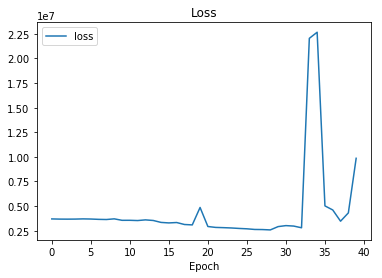

In [96]:
# univariate multi-step vector-output stacked lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from matplotlib import pyplot as plt

# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')

# fit model
history = model.fit(X, y, epochs=40, verbose=1)
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend(['loss'], loc='upper left')
plt.show()

# demonstrate prediction
# x_input = array([70, 80, 90])
# x_input = x_input.reshape((1, n_steps_in, n_features))
# yhat = model.predict(x_input, verbose=1)
# print(yhat)

In [97]:
# demonstrate prediction
yhat = model.predict(Xt, verbose=1)
print(yhat)

1/1 [==============================] - 0s 81ms/step
[[[1189822.6]
  [2689198.5]
  [4452385. ]
  [6789494. ]
  [9665936. ]]]


In [80]:
X = [Xc, Xd]
X = np.array(X)
X.shape

(2,)

In [92]:
history.history

{'loss': [3745261.0,
  4619596.0,
  11371546.0,
  394431456.0,
  390502816.0,
  4842058.0,
  5988034.5,
  190736480.0,
  2396280064.0,
  5188334.0,
  213421696.0,
  732920128.0,
  226418032.0,
  236364288.0,
  13579087.0,
  16221230.0,
  55387488.0,
  32632168.0,
  930771904.0,
  567781888.0,
  800924224.0,
  124442552.0,
  55598064.0,
  116351336.0,
  599995648.0,
  20480716.0,
  361585344.0,
  520777024.0,
  14783466.0,
  126320336.0,
  35210512.0,
  33166050.0,
  573996288.0,
  207135664.0,
  1497290240.0,
  244552720.0,
  26682355712.0,
  1118515072.0,
  3424181504.0,
  10606505984.0]}